# CS 525 Assignment 1
Sirut Buasai, sbuasai2@wpi.edu

### Imports and Downloads

In [1]:
# libraries
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

# NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sirutbuasai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sirutbuasai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sirutbuasai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sirutbuasai/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sirutbuasai/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Data retrieval and processing

In [2]:
# load data from csv files
real_data = pd.read_csv('True.csv')
fake_data = pd.read_csv('Fake.csv')

In [3]:
# clean real data by removing punctuations and special characters and convert string to lower case
real_data = real_data.replace(r'[^A-Za-z0-9]+', ' ', regex=True)
real_data['text'] = real_data['text'].str.lower()
real_data.head()

,title,text,subject,date
0,As U S budget fight looms Republicans flip the...,washington reuters the head of a conservative ...,politicsNews,December 31 2017
1,U S military to accept transgender recruits on...,washington reuters transgender people will be ...,politicsNews,December 29 2017
2,Senior U S Republican senator Let Mr Mueller d...,washington reuters the special counsel investi...,politicsNews,December 31 2017
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geor...,politicsNews,December 30 2017
4,Trump wants Postal Service to charge much more...,seattle washington reuters president donald tr...,politicsNews,December 29 2017


In [4]:
# clean fake data by removing punctuations and special characters and convert string to lower case
fake_data = fake_data.replace(r'[^A-Za-z0-9]+', ' ', regex=True)
fake_data['text'] = fake_data['text'].str.lower()
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year ...,donald trump just couldn t wish all americans ...,News,December 31 2017
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,December 31 2017
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauke...,News,December 30 2017
3,Trump Is So Obsessed He Even Has Obama s Name...,on christmas day donald trump announced that h...,News,December 29 2017
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,December 25 2017


## Task 1: Explore Essential Information from Text Data and Preprocessing
### Text Tokenization

In [5]:
# tokenize real texts
real_data['tokenized_text'] = real_data['text'].apply(nltk.tokenize.word_tokenize)
real_tokens = real_data['tokenized_text'].explode()
real_tokens.dropna(inplace=True)
real_tokens = real_tokens.to_list()

# tokenize fake texts
fake_data['tokenized_text'] = fake_data['text'].apply(nltk.tokenize.word_tokenize)
fake_tokens = fake_data['tokenized_text'].explode()
fake_tokens.dropna(inplace=True)
fake_tokens = fake_tokens.to_list()

# create collection of tokens from both real and fake tokens
collection_tokens = real_tokens + fake_tokens

print(f"Number of real tokens:\t{len(real_tokens)}")
print(f"Number of fake tokens:\t{len(fake_tokens)}")
print(f"Total number of tokens:\t{len(collection_tokens)}")

Number of real tokens:	8435968
Number of fake tokens:	10251160
Total number of tokens:	18687128


### Stop Word Removal

In [6]:
# remove stop words
stop_words = nltk.corpus.stopwords.words('english')
real_stop = [x for x in real_tokens if x not in stop_words]
fake_stop = [x for x in fake_tokens if x not in stop_words]
collection_stop = [x for x in collection_tokens if x not in stop_words]

print(f"Number of real tokens after stop word removal:\t{len(real_stop)}")
print(f"Number of fake tokens after stop word removal:\t{len(fake_stop)}")
print(f"Total number of tokens after stop word removal:\t{len(collection_stop)}")

Number of real tokens after stop word removal:	5037632
Number of fake tokens after stop word removal:	5724253
Total number of tokens after stop word removal:	10761885


### Text Lemminization

In [7]:
# lemmatize tokens
lemmatizer = nltk.stem.WordNetLemmatizer()
real_lemm = [lemmatizer.lemmatize(x) for x in real_stop]
fake_lemm = [lemmatizer.lemmatize(x) for x in fake_stop]
collection_lemm = [lemmatizer.lemmatize(x) for x in collection_stop]

print(f"Number of real tokens after lemminization:\t{len(real_stop)}")
print(f"Number of fake tokens after lemminization:\t{len(fake_stop)}")
print(f"Total number of tokens after lemminization:\t{len(collection_stop)}")

Number of real tokens after lemminization:	5037632
Number of fake tokens after lemminization:	5724253
Total number of tokens after lemminization:	10761885


### Calculate Top 100 Common Words and WordCloud Analysis

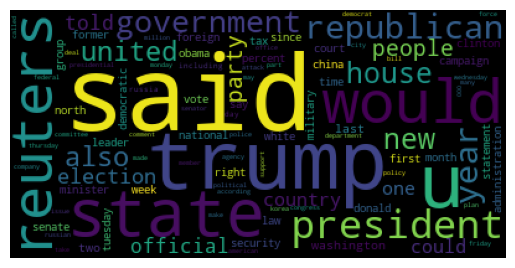

In [8]:
# retrieve top 100 most common words for real data
real_freq = nltk.FreqDist(real_lemm).most_common(100)

# download tables to excel spreadsheet
real_df = pd.DataFrame(data=dict(real_freq), index=[0])
real_df = (real_df.T)
real_df.to_excel('real_freq.xlsx')

# create wordcloud for analysis
real_wordcloud = WordCloud().generate_from_frequencies(dict(real_freq))
plt.imshow(real_wordcloud)
plt.axis('off')
plt.show()

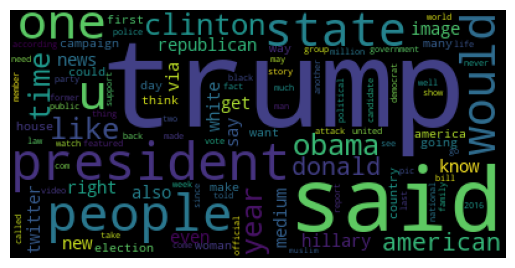

In [9]:
# retrieve top 100 most common words for fake data
fake_freq = nltk.FreqDist(fake_lemm).most_common(100)

# download tables to excel spreadsheet
fake_df = pd.DataFrame(data=dict(fake_freq), index=[0])
fake_df = (fake_df.T)
fake_df.to_excel('fake_freq.xlsx')

# create wordcloud for analysis
fake_wordcloud = WordCloud().generate_from_frequencies(dict(fake_freq))
plt.imshow(fake_wordcloud)
plt.axis('off')
plt.show()

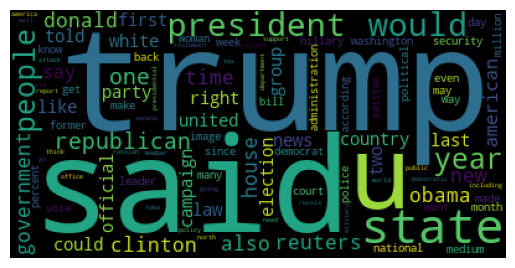

In [10]:
# retrieve top 100 most common words for real data
collection_freq = nltk.FreqDist(collection_lemm).most_common(100)

# download tables to excel spreadsheet
collection_df = pd.DataFrame(data=dict(collection_freq), index=[0])
collection_df = (collection_df.T)
collection_df.to_excel('collection_freq.xlsx')

# create wordcloud for analysis
collection_wordcloud = WordCloud().generate_from_frequencies(dict(collection_freq))
plt.imshow(collection_wordcloud)
plt.axis('off')
plt.show()

## Task 2: Build Machine Learning Model

In [11]:
# create labels for real and fake data
real_data['label'] = 1
fake_data['label'] = 0

# extract text and label
real_raw = real_data[['text','tokenized_text', 'label']]
fake_raw = fake_data[['text','tokenized_text', 'label']]

# combine the real and fake data
data_raw = pd.concat([real_raw, fake_raw])
data_raw = data_raw.sample(frac=1).reset_index(drop=True)
data_raw.head()

,text,tokenized_text,label
0,reuters highlights of the day for u s preside...,"[reuters, highlights, of, the, day, for, u, s,...",1
1,j christian adams dead people are voting and i...,"[j, christian, adams, dead, people, are, votin...",0
2,jerusalem reuters an israeli and a palestinian...,"[jerusalem, reuters, an, israeli, and, a, pale...",1
3,dubai reuters a senior uae diplomat said on we...,"[dubai, reuters, a, senior, uae, diplomat, sai...",1
4,newtown pa new york reuters republican preside...,"[newtown, pa, new, york, reuters, republican, ...",1


### Create Training Testing Split

In [12]:
# split data into training and testing set with 70-30 split ratio
train_x, test_x, train_y, test_y = train_test_split(data_raw['text'], data_raw['label'], test_size=0.3)
train_x.head()

8712     spewing falsehoods has become the favorite pas...
34632    now that republicans are only a month away fro...
13449    national security council aide craig deare was...
41561    students in idaho are one vote away from havin...
1049     no wonder obama wasn t vetted here s a fox new...
Name: text, dtype: object

### TF-IDF Feature Set

In [13]:
# create TF-IDF feature set
tfidf_vect = TfidfVectorizer()

tfidf_train_x = tfidf_vect.fit_transform(train_x)
tfidf_test_x = tfidf_vect.transform(test_x)

#### Logistic Regression on TF-IDF Feature Set

In [14]:
# perform logistic regresstion model on TF-IDF feature
tfidf_log = LogisticRegression(solver='liblinear')

# train model on training set
tfidf_log.fit(tfidf_train_x, train_y)

# test model on testing set
prediction_y = tfidf_log.predict(tfidf_test_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9846555163418751
Recall score:		0.9881429011395134
Accuracy score:		0.9868596881959911


#### Multinomial Naive Bayes on TF-IDF Feature Set

In [15]:
# perform multinomial naive bayes model on TF-IDF feature
tfidf_mnb = MultinomialNB()

# train model on training set
tfidf_mnb.fit(tfidf_train_x, train_y)

# test model on testing set
prediction_y = tfidf_mnb.predict(tfidf_test_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9451840250587314
Recall score:		0.9293193717277487
Accuracy score:		0.9399406087602079


### Bag of Words Feature Set

In [16]:
# create Bag of Words feature set
bow_vect = CountVectorizer()

bow_train_x = bow_vect.fit_transform(train_x)
bow_test_x = bow_vect.transform(test_x)

#### Logistic Regression on Bag of Words Feature Set

In [17]:
# perform logistic regresstion model on Bag of Words feature
bow_log = LogisticRegression(solver='liblinear')

# train model on training set
bow_log.fit(bow_train_x, train_y)

# test model on testing set
prediction_y = bow_log.predict(bow_test_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9963082602676512
Recall score:		0.9973821989528796
Accuracy score:		0.9969561989606534


#### Multinomial Naive Bayes on Bag of Words Feature Set

In [18]:
# perform logistic regresstion model on Bag of Words feature
bow_mnb = MultinomialNB()

# train model on training set
bow_mnb.fit(bow_train_x, train_y)

# test model on testing set
prediction_y = bow_mnb.predict(bow_test_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.947769148774174
Recall score:		0.9584231598398522
Accuracy score:		0.9544914625092799


### Confusion Matrix on Top 2 Models
#### Rank 1: Logistic Regression on Bag of Words Feature Set

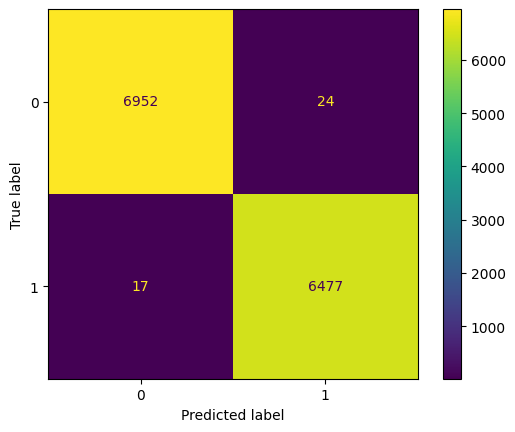

In [19]:
ConfusionMatrixDisplay.from_estimator(bow_log, bow_test_x, test_y)

#### Rank 2: Logistic Regression on TF-IDF Feature Set

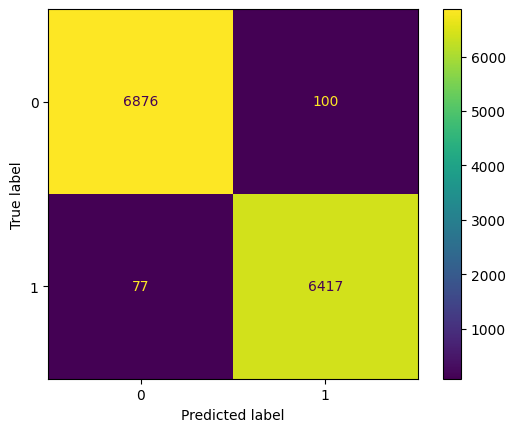

In [20]:
ConfusionMatrixDisplay.from_estimator(tfidf_log, tfidf_test_x, test_y)

## Task 3: Enhanced NLP Features

In [21]:
# reuse dataframe from task 2 that includes both real and fake data
data_raw.head()

,text,tokenized_text,label
0,reuters highlights of the day for u s preside...,"[reuters, highlights, of, the, day, for, u, s,...",1
1,j christian adams dead people are voting and i...,"[j, christian, adams, dead, people, are, votin...",0
2,jerusalem reuters an israeli and a palestinian...,"[jerusalem, reuters, an, israeli, and, a, pale...",1
3,dubai reuters a senior uae diplomat said on we...,"[dubai, reuters, a, senior, uae, diplomat, sai...",1
4,newtown pa new york reuters republican preside...,"[newtown, pa, new, york, reuters, republican, ...",1


### Stop Word Removal

In [22]:
# remove stop words
stop_words = nltk.corpus.stopwords.words('english')
data_raw['stop_removed_text'] = data_raw['tokenized_text'].apply(lambda sentence: ' '.join([word for word in sentence if word not in stop_words]))
data_raw.head()

,text,tokenized_text,label,stop_removed_text
0,reuters highlights of the day for u s preside...,"[reuters, highlights, of, the, day, for, u, s,...",1,reuters highlights day u president donald trum...
1,j christian adams dead people are voting and i...,"[j, christian, adams, dead, people, are, votin...",0,j christian adams dead people voting something...
2,jerusalem reuters an israeli and a palestinian...,"[jerusalem, reuters, an, israeli, and, a, pale...",1,jerusalem reuters israeli palestinian killed t...
3,dubai reuters a senior uae diplomat said on we...,"[dubai, reuters, a, senior, uae, diplomat, sai...",1,dubai reuters senior uae diplomat said wednesd...
4,newtown pa new york reuters republican preside...,"[newtown, pa, new, york, reuters, republican, ...",1,newtown pa new york reuters republican preside...


### POS Tagging

In [23]:
# POS tag the tokenized text without stop words
data_raw['pos_tagged_text'] = nltk.pos_tag_sents(data_raw['tokenized_text'])
data_raw.head()

,text,tokenized_text,label,stop_removed_text,pos_tagged_text
0,reuters highlights of the day for u s preside...,"[reuters, highlights, of, the, day, for, u, s,...",1,reuters highlights day u president donald trum...,"[(reuters, NNS), (highlights, NNS), (of, IN), ..."
1,j christian adams dead people are voting and i...,"[j, christian, adams, dead, people, are, votin...",0,j christian adams dead people voting something...,"[(j, NN), (christian, JJ), (adams, NNS), (dead..."
2,jerusalem reuters an israeli and a palestinian...,"[jerusalem, reuters, an, israeli, and, a, pale...",1,jerusalem reuters israeli palestinian killed t...,"[(jerusalem, NN), (reuters, VBZ), (an, DT), (i..."
3,dubai reuters a senior uae diplomat said on we...,"[dubai, reuters, a, senior, uae, diplomat, sai...",1,dubai reuters senior uae diplomat said wednesd...,"[(dubai, NN), (reuters, VBZ), (a, DT), (senior..."
4,newtown pa new york reuters republican preside...,"[newtown, pa, new, york, reuters, republican, ...",1,newtown pa new york reuters republican preside...,"[(newtown, RB), (pa, JJ), (new, JJ), (york, NN..."


In [24]:
# list of POS tags from https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
# 3 filters given the frequency of nouns in fake news and verbs in real news
nouns = ['NN', 'NNS', 'NNP', 'NNPS']
verbs = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VPZ']
nouns_verbs = nouns + verbs

# apply filters to the data
data_raw['nouns'] = data_raw['pos_tagged_text'].apply(lambda pair: ' '.join([word for word, tag in pair if tag in nouns]))
data_raw['verbs'] = data_raw['pos_tagged_text'].apply(lambda pair: ' '.join([word for word, tag in pair if tag in verbs]))
data_raw['nouns_verbs'] = data_raw['pos_tagged_text'].apply(lambda pair: ' '.join([word for word, tag in pair if tag in nouns_verbs]))
data_raw.head()

,text,tokenized_text,label,stop_removed_text,pos_tagged_text,nouns,verbs,nouns_verbs
0,reuters highlights of the day for u s preside...,"[reuters, highlights, of, the, day, for, u, s,...",1,reuters highlights day u president donald trum...,"[(reuters, NNS), (highlights, NNS), (of, IN), ...",reuters highlights day president donald admini...,trump are working provide add said asia taking...,reuters highlights day president donald trump ...
1,j christian adams dead people are voting and i...,"[j, christian, adams, dead, people, are, votin...",0,j christian adams dead people voting something...,"[(j, NN), (christian, JJ), (adams, NNS), (dead...",j adams people something administration anythi...,are voting s want do like like are voting have...,j adams people are voting s something administ...
2,jerusalem reuters an israeli and a palestinian...,"[jerusalem, reuters, an, israeli, and, a, pale...",1,jerusalem reuters israeli palestinian killed t...,"[(jerusalem, NN), (reuters, VBZ), (an, DT), (i...",jerusalem thursday incidents israel bank offic...,were killed said was stabbed said was continui...,jerusalem were killed thursday incidents israe...
3,dubai reuters a senior uae diplomat said on we...,"[dubai, reuters, a, senior, uae, diplomat, sai...",1,dubai reuters senior uae diplomat said wednesd...,"[(dubai, NN), (reuters, VBZ), (a, DT), (senior...",dubai diplomat world turkey gulf state comment...,said be led s broke called said was rally egyp...,dubai diplomat said world be led turkey gulf s...
4,newtown pa new york reuters republican preside...,"[newtown, pa, new, york, reuters, republican, ...",1,newtown pa new york reuters republican preside...,"[(newtown, RB), (pa, JJ), (new, JJ), (york, NN...",york reuters candidate donald clinton voters w...,trump gained cutting according polling release...,york reuters candidate donald trump gained cli...


### Create Training Testing Split

In [25]:
# split data into training and testing set with 70-30 split ratio
train_x, test_x, train_y, test_y = train_test_split(data_raw[['nouns', 'verbs', 'nouns_verbs']], data_raw['label'], test_size=0.3)
train_x.head()

,nouns,verbs,nouns_verbs
26591,simplest terms way trump supporters way things...,describe be call interesting interesting have ...,simplest terms way describe trump supporters b...
12298,havana group senators legislation thursday res...,washington reintroduced repeal cuba attracting...,havana washington group senators reintroduced ...
28263,hell orlando donald guy world hitler thousands...,happened been comparing adolf ordered raise sw...,hell happened orlando donald guy world been co...
11968,washington state numbers supremacist groups am...,suspect have see are considering be surprised ...,suspect washington state have numbers supremac...
35933,city reuters governments wednesday decision ho...,said supported proceed s expressed issued urge...,city reuters governments said wednesday suppor...


### TF-IDF Feature Set (Noun, Verb, Noun+Verb)

In [26]:
# create TF-IDF feature set
tfidf_vect = TfidfVectorizer()

# nouns
tfidf_train_nouns_x = tfidf_vect.fit_transform(train_x['nouns'])
tfidf_test_nouns_x = tfidf_vect.transform(test_x['nouns'])

# verbs
tfidf_train_verbs_x = tfidf_vect.fit_transform(train_x['verbs'])
tfidf_test_verbs_x = tfidf_vect.transform(test_x['verbs'])

# nouns_verbs
tfidf_train_nouns_verbs_x = tfidf_vect.fit_transform(train_x['nouns_verbs'])
tfidf_test_nouns_verbs_x = tfidf_vect.transform(test_x['nouns_verbs'])

#### Logistic Regression on TF-IDF Noun Feature Set

In [27]:
# perform logistic regresstion model on TF-IDF feature
tfidf_log = LogisticRegression(solver='liblinear')

# train model on training set
tfidf_log.fit(tfidf_train_nouns_x, train_y)

# test model on testing set
prediction_y = tfidf_log.predict(tfidf_test_nouns_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9724671307037897
Recall score:		0.9774564676616916
Accuracy score:		0.9760207869339272


#### Logistic Regression on TF-IDF Verb Feature Set

In [28]:
# train model on training set
tfidf_log.fit(tfidf_train_verbs_x, train_y)

# test model on testing set
prediction_y = tfidf_log.predict(tfidf_test_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.94663139878637
Recall score:		0.9458955223880597
Accuracy score:		0.9487008166295472


#### Logistic Regression on TF-IDF Noun+Verb Feature Set

In [29]:
# train model on training set
tfidf_log.fit(tfidf_train_nouns_verbs_x, train_y)

# test model on testing set
prediction_y = tfidf_log.predict(tfidf_test_nouns_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.979282622139765
Recall score:		0.9847636815920398
Accuracy score:		0.9827765404602821


#### Multinomial Naive Bayes on TF-IDF Noun Feature Set

In [30]:
# perform multinomial naive bayes model on TF-IDF feature
tfidf_mnb = MultinomialNB()

# train model on training set
tfidf_mnb.fit(tfidf_train_nouns_x, train_y)

# test model on testing set
prediction_y = tfidf_mnb.predict(tfidf_test_nouns_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9204634413652732
Recall score:		0.914023631840796
Accuracy score:		0.9212323682256867


#### Multinomial Naive Bayes on TF-IDF Verb Feature Set

In [31]:
# train model on training set
tfidf_mnb.fit(tfidf_train_verbs_x, train_y)

# test model on testing set
prediction_y = tfidf_mnb.predict(tfidf_test_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9243684293111565
Recall score:		0.915889303482587
Accuracy score:		0.9240534521158129


#### Multinomial Naive Bayes on TF-IDF Noun+Verb Feature Set

In [32]:
# train model on training set
tfidf_mnb.fit(tfidf_train_nouns_verbs_x, train_y)

# test model on testing set
prediction_y = tfidf_mnb.predict(tfidf_test_nouns_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9282476160700328
Recall score:		0.9231965174129353
Accuracy score:		0.9292501855976244


### Bag of Words Feature Set (Noun, Verb, Noun+Verb)

In [33]:
# create TF-IDF feature set
bow_vect = CountVectorizer()

# nouns
bow_train_nouns_x = bow_vect.fit_transform(train_x['nouns'])
bow_test_nouns_x = bow_vect.transform(test_x['nouns'])

# verbs
bow_train_verbs_x = bow_vect.fit_transform(train_x['verbs'])
bow_test_verbs_x = bow_vect.transform(test_x['verbs'])

# nouns_verbs
bow_train_nouns_verbs_x = bow_vect.fit_transform(train_x['nouns_verbs'])
bow_test_nouns_verbs_x = bow_vect.transform(test_x['nouns_verbs'])

#### Logistic Regression on Bag of Words Noun Feature Set

In [34]:
# perform logistic regresstion model on TF-IDF feature
bow_log = LogisticRegression(solver='liblinear')

# train model on training set
bow_log.fit(bow_train_nouns_x, train_y)

# test model on testing set
prediction_y = bow_log.predict(bow_test_nouns_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9873949579831933
Recall score:		0.9864738805970149
Accuracy score:		0.9875278396436525


#### Logistic Regression on Bag of Words Verb Feature Set

In [35]:
# train model on training set
bow_log.fit(bow_train_verbs_x, train_y)

# test model on testing set
prediction_y = bow_log.predict(bow_test_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9619813850765105
Recall score:		0.9480721393034826
Accuracy score:		0.9573125463994061


#### Logistic Regression on Bag of Words Noun+Verb Feature Set

In [36]:
# train model on training set
bow_log.fit(bow_train_nouns_verbs_x, train_y)

# test model on testing set
prediction_y = bow_log.predict(bow_test_nouns_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9895589839488858
Recall score:		0.9872512437810945
Accuracy score:		0.9889383815887156


#### Multinomial Naive Bayes on Bag of Words Noun Feature Set

In [37]:
# perform multinomial naive bayes model on TF-IDF feature
bow_mnb = MultinomialNB()

# train model on training set
bow_mnb.fit(bow_train_nouns_x, train_y)

# test model on testing set
prediction_y = bow_mnb.predict(bow_test_nouns_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9309917994739285
Recall score:		0.935478855721393
Accuracy score:		0.9360801781737194


#### Multinomial Naive Bayes on Bag of Words Verb Feature Set

In [38]:
# train model on training set
bow_mnb.fit(bow_train_verbs_x, train_y)

# test model on testing set
prediction_y = bow_mnb.predict(bow_test_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9249017830160169
Recall score:		0.9516480099502488
Accuracy score:		0.940014847809948


#### Multinomial Naive Bayes on Bag of Words Noun+Verb Feature Set

In [39]:
# train model on training set
bow_mnb.fit(bow_train_nouns_verbs_x, train_y)

# test model on testing set
prediction_y = bow_mnb.predict(bow_test_nouns_verbs_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9384449244060475
Recall score:		0.9457400497512438
Accuracy score:		0.9444691907943579
